# Tennis play predication using Decision Tree

We predicate tenis play or not using decision tree. For the same car dataset used which is downloaded from kaggle.

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model creation

4.Model evaluation

In [70]:
##1.Importing dependencies and Load data
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [14]:
#Load Dataset

data=pd.read_csv('PlayTennis.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
#2. EDA
#rows and columns

data.shape

(14, 5)

In [5]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
# Columns

data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [7]:
# Data types

data.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
Play Tennis    object
dtype: object

In [8]:
# Description

data.describe()

,Outlook,Temperature,Humidity,Wind,Play Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [9]:
# Checking Null Values

data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [15]:
# X - independent variable

X=data.drop('Play Tennis',axis=1)
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [16]:
#y-dependent variable

y=data['Play Tennis']

In [97]:
data.Outlook.value_counts()

Sunny       5
Rain        5
Overcast    4
Name: Outlook, dtype: int64

In [134]:
# Data encoder

le=LabelEncoder()
y1=le.fit_transform(y)
y1

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [135]:
X['Outlook']=le.fit_transform(X['Outlook'])
X['Outlook'].values

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [136]:
X['Temperature']=le.fit_transform(X['Temperature'])
X['Temperature'].values

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], dtype=int64)

In [137]:
X['Humidity']=le.fit_transform(X['Humidity'])
X['Humidity'].values

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [138]:
X['Wind']=le.fit_transform(X['Wind'])
X['Wind'].values

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [139]:
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [140]:
#3. Model Creation
# Splitting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print("X_tarin:",np.shape(X_train))
print("X_test:",np.shape(X_test))
print("y_train:",np.shape(y_train))
print("y_test:",np.shape(y_test))

X_tarin: (9, 4)
X_test: (5, 4)
y_train: (9,)
y_test: (5,)


In [141]:
#Model Selection

dt=DecisionTreeClassifier(criterion='entropy')
model=dt.fit(X_train,y_train)

In [153]:
# predicate the testing and training data

y_pred=model.predict(X_test)
y_model_train=model.predict(X_train)

In [154]:
result=model.predict([[2,2,1,0]])

C:\Users\MADHURI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [155]:
result

array(['Yes'], dtype=object)

In [156]:
#4. Model Evalution
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[2, 1],
       [0, 2]], dtype=int64)

In [157]:
# accuracy score of testing data

accuracy_score(y_test,y_pred)

0.8

In [158]:
# accuracy score of traing data

accuracy_score(y_train,y_model_train)

1.0

Difference between testing and training accuracy is low,hence model is not overfitting

In [159]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
print("TP:",TP)
print("FP:",FP)
print("FN:",FN)
print("TN:",TN)

TP: 2
FP: 1
FN: 0
TN: 2


In [160]:
print("Precision:",TP/(TP+FP))

Precision: 0.6666666666666666


In [161]:
print("Recall:",TP/(TP+FN))

Recall: 1.0


[Text(0.6, 0.9, 'X[2] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.7, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

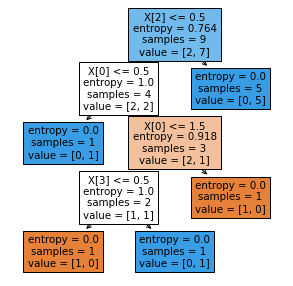

In [174]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt,filled=True)

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [ ]:
# Handling Overfitting using Prunning

In [165]:
path=dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [166]:
ccp_alphas

array([0.        , 0.14814815, 0.31976006])

In [167]:
impurities

array([0.        , 0.44444444, 0.76420451])

In [168]:
dt1=DecisionTreeClassifier(ccp_alpha=0.1,criterion='entropy')
model=dt1.fit(X_train,y_train)

In [169]:
y1_pred=model.predict(X_test)
accuracy_score(y_test,y1_pred)

0.8

In [170]:
y2_pred=model.predict(X_train)
accuracy_score(y_train,y2_pred)

1.0

[Text(0.6, 0.9, 'X[2] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.7, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

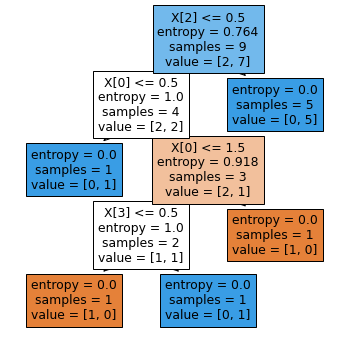

In [173]:
plt.figure(figsize=(6,6))
tree.plot_tree(dt1,filled=True)

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

